In [26]:
import pymongo
import datetime
import collections

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats
from collections import Counter
from sklearn import cluster

# Initial exploration on Pearson's *R*²

We will now perform Pearson's *R*² on our data set to see if there is any correlation between percentage of votes towards the leave option and the accumulate number of international immigrantes received in the region during the last decade.

In [27]:
immigration_referendum_df = pd.read_csv("data/immigration_referendum_df.csv",index_col="Unnamed: 0")
immigration_referendum_df.head()

,Area_Code,Area_x,country,population_2001,births_2002,deaths_2002,natchange_2002,internal_in_2002,internal_out_2002,internal_net_2002,...,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
0,E06000001,Hartlepool,E,90152,1017,1042,-25,2140,2301,-161,...,14029,32071,34,0,12,6,16,30.43,69.57,0.07
1,E06000002,Middlesbrough,E,141233,1663,1396,267,5109,6737,-1628,...,21181,40177,35,0,16,1,18,34.52,65.48,0.06
2,E06000003,Redcar and Cleveland,E,139159,1336,1523,-187,3951,4259,-308,...,24586,48128,27,0,6,0,21,33.81,66.19,0.04
3,E06000004,Stockton-on-Tees,E,183795,1938,1719,219,6269,5531,738,...,38433,61982,45,2,13,2,28,38.27,61.73,0.04
4,E06000005,Darlington,E,97894,1102,1173,-71,3815,3521,294,...,24172,30994,29,0,0,0,29,43.82,56.18,0.05


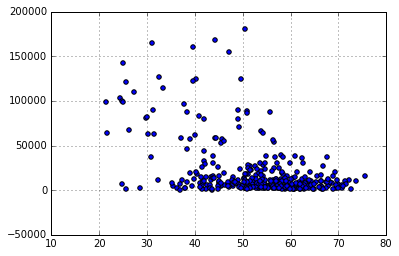

In [28]:
plt.scatter(immigration_referendum_df['Pct_Leave'],
            immigration_referendum_df['international_in_total'])
plt.grid(True)


In [29]:
scipy.stats.pearsonr(immigration_referendum_df['international_in_total'],
            immigration_referendum_df['Pct_Leave'])

(-0.48197796932292253, 1.4761092141475334e-23)

In [30]:
scipy.stats.pearsonr(immigration_referendum_df['population_2014'],
            immigration_referendum_df['Pct_Leave'])

(-0.1937236147116527, 0.00014179526097094045)

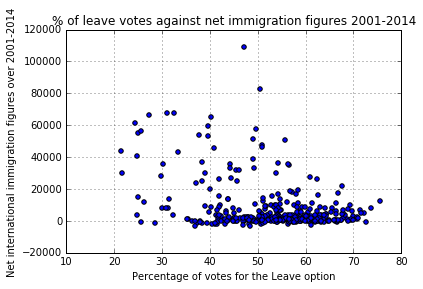

In [31]:
plt.scatter(immigration_referendum_df['Pct_Leave'],
            immigration_referendum_df['international_net_total'])
plt.grid(True)
plt.xlabel("Percentage of votes for the Leave option")
plt.ylabel("Net international immigration figures over 2001-2014")
plt.title("% of leave votes against net immigration figures 2001-2014")
plt.savefig("initial plot")

In [32]:
scipy.stats.pearsonr(immigration_referendum_df['international_net_total'],
            immigration_referendum_df['Pct_Leave'])

(-0.37106313080621045, 6.9894322280490726e-14)

From the Pearson's *R*² test we perceive that the there seems to be a moderate negative correlation (-0.37...) between the number of accumulate immigrants during the last decade and the likelihood for the district to vote for the leave option.